In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

CLEAN_PATH = "/home/yifan/dataset/confusion/pairflip/cifar10/0"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"


ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

DEVICE='cuda:0'
########## initulize reference data and target data
from alignment.data_preprocess import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH)
tar_datainit = DataInit(CLEAN_PATH,CLEAN_PATH,TAR_EPOCH)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from alignment.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(mes_val_for_diff=18,mes_val_for_same=0.8,conf_val_for_diff=0.3,conf_val_for_same=0.05)


from representationTrans.trans_visualizer_border import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 383.79it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 7542.68it/s]


absolute alignment indicates number: 151 label diff indicates number: 5012 confidence diff indicates number: 11 high distance number: 4484


In [2]:
X = ref_train_data
Y = tar_train_data

In [7]:
from AlignVis.ApproximateRepGenerator import ApproximateRefGenerator
aeg = ApproximateRefGenerator(ref_provider=ref_provider, tar_provider=tar_provider, REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH, tar_model=tar_model, ref_model=ref_model,DEVICE=DEVICE)
high_discrepancy_representation_set = aeg.getHighDiscrepancyRepresentationSet(percentile=95)

100%|██████████| 250/250 [00:00<00:00, 6734.85it/s]


Number of samples with highest transformation degree: 2500


In [8]:
from AlignVis.AlignMetrixGenerator import TrainingSnapshotAlignment

alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
S_n = alignment_n.align_embeddings_batch(X,Y,train_steps=1000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-18,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 93927888.0 loss2 {tensor(0.7623, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8810, requires_grad=True)}
batch_idx 199,iteration 199, loss1 270.08233642578125 loss2 {tensor(0.4765, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5090, requires_grad=True)}
batch_idx 398,iteration 398, loss1 203.30206298828125 loss2 {tensor(0.3390, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4740, requires_grad=True)}
batch_idx 97,iteration 597, loss1 199.2296905517578 loss2 {tensor(0.3532, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4720, requires_grad=True)}
batch_idx 296,iteration 796, loss1 180.8869171142578 loss2 {tensor(0.3280, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4430, requires_grad=True)}
batch_idx 495,iteration 995, loss1 161.54052734375 loss2 {tensor(0.2617, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3980, requires_grad=True)}


In [20]:
R_n = alignment_n.align_embeddings_batch(Y,X,train_steps=10000,CKA_LAMBDA=10,CKA_LAMBAD_FOR_INIT=1e-8,N_LAMBDA=10)

batch_idx 0,iteration 0, loss1 92523312.0 loss2 {tensor(0.7050, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8550, requires_grad=True)}
batch_idx 199,iteration 199, loss1 306.1293640136719 loss2 {tensor(0.5622, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5470, requires_grad=True)}
batch_idx 398,iteration 398, loss1 240.5684814453125 loss2 {tensor(0.4891, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5220, requires_grad=True)}
batch_idx 97,iteration 597, loss1 206.26129150390625 loss2 {tensor(0.4505, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5010, requires_grad=True)}
batch_idx 296,iteration 796, loss1 194.95542907714844 loss2 {tensor(0.4255, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4700, requires_grad=True)}
batch_idx 495,iteration 995, loss1 174.83868408203125 loss2 {tensor(0.3184, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4270, requires_grad=True)}
batch_idx 194,iteration 1194, loss1 176.7255401611328 loss2 {tensor(0.3269, grad_fn=<AddBackward0>)} neibour_

Computing decision regions ...


100%|██████████| 1/1 [00:00<00:00, 4219.62it/s]


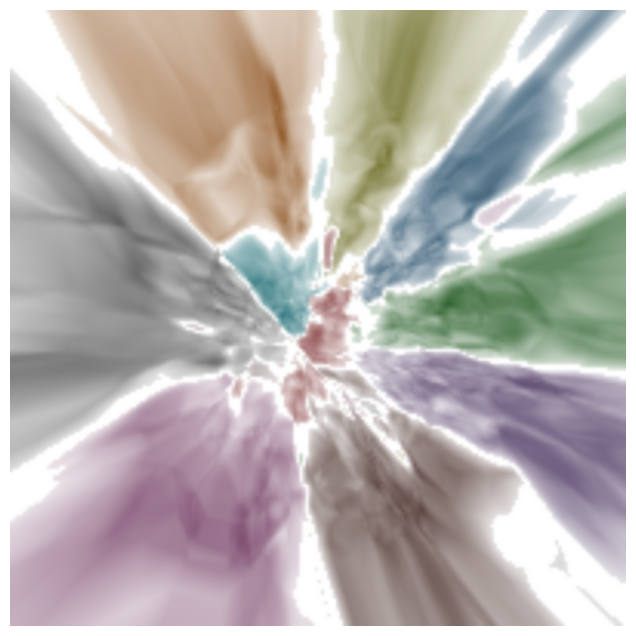

In [25]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider, I,I, np.dot(ref_train_data, I), projector, 200,[[]],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 9622.94it/s]
../representationTrans/trans_visualizer_border.py:186: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_data = self.data_provider.train_representation(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_labels = self.data_provider.train_labels(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

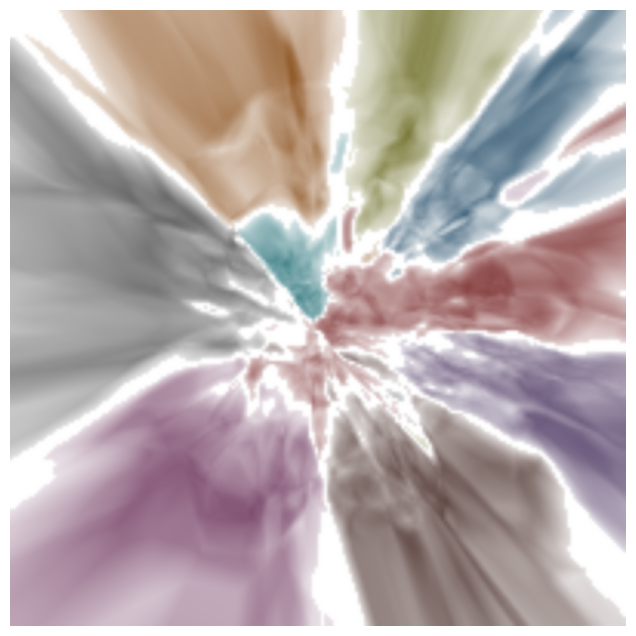

In [24]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, S_n.detach().numpy(),I, np.dot(tar_train_data, R_n.detach().numpy()), projector, 200,[[]],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))